In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#%cd /content/gdrive/My\ Drive 
%cd /content/ 

/content


In [ ]:
from getpass import getpass
import os
user = getpass('User')
password = getpass('Password')
os.environ['GIT_AUTH'] = user + ':' + password

!git clone https://$GIT_AUTH@github.com/Ace95/DeepLearning_Project.git  

User··········
Password··········
Cloning into 'DeepLearning_Project'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 203221 (delta 44), reused 90 (delta 19), pack-reused 203103
Receiving objects: 100% (203221/203221), 1.44 GiB | 30.82 MiB/s, done.
Resolving deltas: 100% (396/396), done.
Checking out files: 100% (42058/42058), done.


Change to directory of our code

In [ ]:
# %cd /content/gdrive/My\ Drive/DeepLearning_Project/CNNfromScratch/
%cd /content/DeepLearning_Project/CNNfromScratch/


/content/DeepLearning_Project/CNNfromScratch


## Import and initialization

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def save_history(history,fileName):
    hist_df = pd.DataFrame(history)
    with open(fileName,mode='w') as f:
        hist_df.to_csv(f)

def save_elapsedTime(elapsedTime,fileName):
    f = open(fileName,'a+')
    f.write('%%Elapsed Time: {:.2f}m. \n'.format(elapsedTime/60))
    f.close()
        
def find_next_file_history(dirHistory, fileName):
    if not os.path.exists(dirHistory):
        os.makedirs(dirHistory)
    files = os.listdir(dirHistory)
    if len(files) > 0:
        for f in files:
            if f.endswith('.csv'):
                return (dirHistory+'/'+fileName[0:fileName.find('.')]
                        +'_' + str(len(files)) +'.csv')
            else:
                return (dirHistory+'/'+fileName)
    else:
        return (dirHistory+'/'+fileName)

            
    

    
def show_history(history):
    ACC = 'acc' # for keras
    VAL_ACC = 'val_acc'
    plt.plot(history.history[ACC]) # on keras wo tensorflow the parameter is 'acc'
    plt.plot(history.history[VAL_ACC]) # on keras wo tensorflow the parameter is 'acc'
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='best')
    
    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(history.history['loss'], 'red', label='Training loss')
    plt.plot(history.history['val_loss'], 'blue', label='Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='best')
    plt.savefig('./models/plot_history.png')
    plt.show()

In [ ]:
import time

import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image  import ImageDataGenerator
imageShape=(218,178) #Celeba croped image shape
histFileName = 'historyCNN4.csv'
dirHistFileName = './history'
numEpochs=20
modelsFile = './models/CNN4_celeba_model.h5'
trainDIR='../orient/train'
valDIR='../orient/valid'
testDIR='../orient/test'


In [ ]:
start = time.time()

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=imageShape+(3,))) #diff from example 
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.7))

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.7))

cnn4.add(Dense(3, activation='softmax')) ## Final number of categories

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['acc'])

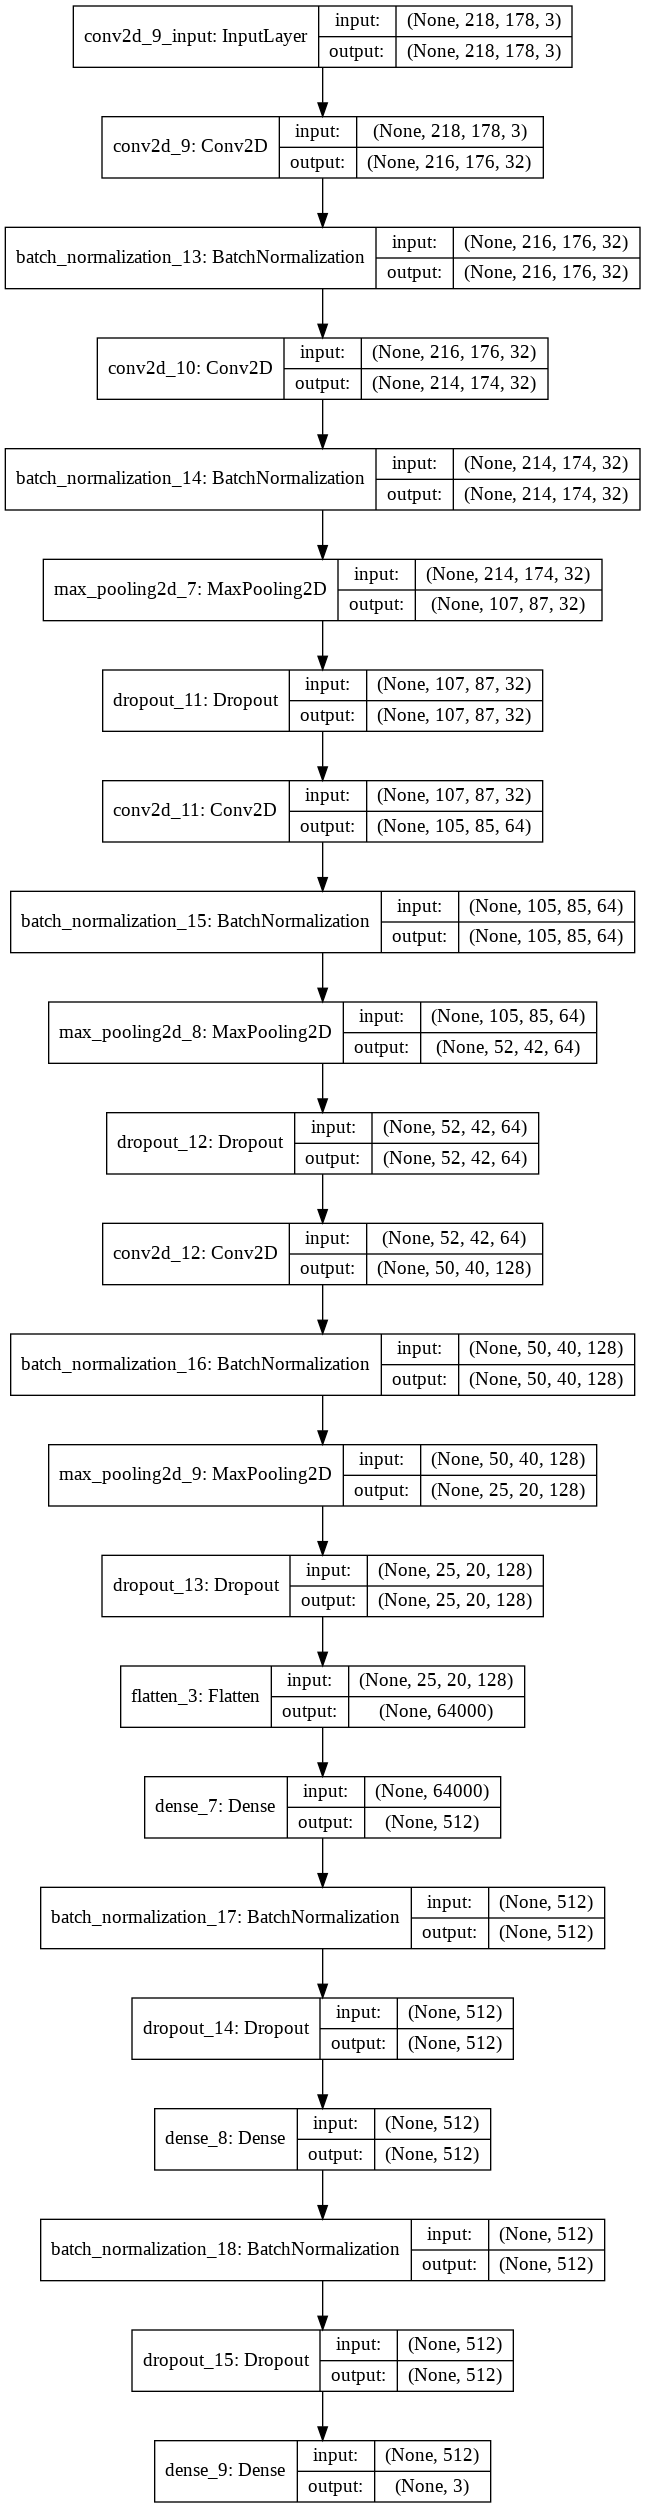

In [ ]:
# Let's display our CNN strucutre
from keras.utils.vis_utils import plot_model
plot_model(cnn4, to_file='./models/cnn4.png', show_shapes=True, show_layer_names=True)

In [ ]:
train_datagen = ImageDataGenerator()

# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(trainDIR,
                                                    target_size=imageShape,
                                                    color_mode='rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle= True)

val_generator = train_datagen.flow_from_directory(valDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


Found 8383 images belonging to 3 classes.
Found 1811 images belonging to 3 classes.


In [ ]:
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
history = cnn4.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=numEpochs,
                    validation_data=val_generator,validation_steps=step_size_val)

cnn4.save('./models/CNN4_celeba_model.h5')
# serialize model to JSON
model_json = cnn4.to_json()
with open("./models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


end = time.time()
elapsedTime= (end - start)
print("Elapsed Time:")
print("\t\t{:.2f}m".format(elapsedTime/60))

Epoch 1/20
261/261 [==============================] - 104s 398ms/step - loss: 0.9891 - acc: 0.6847 - val_loss: 0.3162 - val_acc: 0.8225
Epoch 2/20
261/261 [==============================] - 103s 393ms/step - loss: 0.5754 - acc: 0.7961 - val_loss: 0.2550 - val_acc: 0.8404
Epoch 3/20
261/261 [==============================] - 102s 392ms/step - loss: 0.4497 - acc: 0.8330 - val_loss: 0.6266 - val_acc: 0.8297
Epoch 4/20
261/261 [==============================] - 102s 392ms/step - loss: 0.3976 - acc: 0.8450 - val_loss: 0.5166 - val_acc: 0.8387
Epoch 5/20
261/261 [==============================] - 103s 393ms/step - loss: 0.3785 - acc: 0.8537 - val_loss: 0.5161 - val_acc: 0.7931
Epoch 6/20
261/261 [==============================] - 102s 392ms/step - loss: 0.3764 - acc: 0.8556 - val_loss: 0.4015 - val_acc: 0.8465
Epoch 7/20
261/261 [==============================] - 102s 392ms/step - loss: 0.3455 - acc: 0.8668 - val_loss: 0.4136 - val_acc: 0.8477
Epoch 8/20
261/261 [============================

In [ ]:
testDIR='../orient/test'
val_test = train_datagen.flow_from_directory(
    directory=testDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


step_size_val = val_test.n//val_test.batch_size
score1 = cnn4.evaluate_generator(generator=val_test,steps=step_size_val)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Found 1005 images belonging to 3 classes.
Test loss: 0.3275854289531708
Test accuracy: 0.8145161271095276


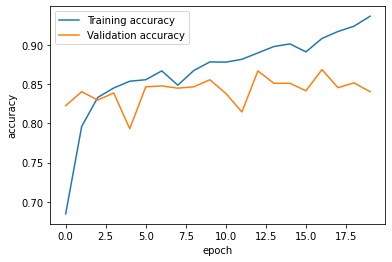

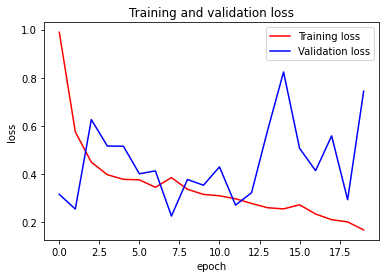

In [ ]:
show_history(history)
finalHistoryFile=find_next_file_history(dirHistFileName,histFileName)
save_history(history.history,finalHistoryFile)

save_elapsedTime(elapsedTime,finalHistoryFile)


In [ ]:
# Now let's try it with some Data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=0, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(trainDIR,
                                                    target_size=imageShape,
                                                    color_mode='rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle= True)

val_generator = train_datagen.flow_from_directory(valDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)



Found 8383 images belonging to 3 classes.
Found 1811 images belonging to 3 classes.


In [ ]:
start = time.time()
numEpochs = 20
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
history = cnn4.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=numEpochs,
                    validation_data=val_generator,validation_steps=step_size_val)

cnn4.save('./models/CNN4_celeba_model-aug.h5')
end = time.time()
elapsedTime= (end - start)
print("Elapsed Time:")
print("\t\t{:.2f}m".format(elapsedTime/60))

Epoch 1/20
261/261 [==============================] - 130s 497ms/step - loss: 0.4901 - acc: 0.7937 - val_loss: 0.3220 - val_acc: 0.7952
Epoch 2/20
261/261 [==============================] - 131s 501ms/step - loss: 0.4459 - acc: 0.8170 - val_loss: 0.5811 - val_acc: 0.7943
Epoch 3/20
261/261 [==============================] - 131s 502ms/step - loss: 0.4247 - acc: 0.8199 - val_loss: 0.5899 - val_acc: 0.8196
Epoch 4/20
261/261 [==============================] - 131s 501ms/step - loss: 0.4249 - acc: 0.8282 - val_loss: 0.3699 - val_acc: 0.8168
Epoch 5/20
261/261 [==============================] - 130s 498ms/step - loss: 0.4165 - acc: 0.8297 - val_loss: 0.5417 - val_acc: 0.7915
Epoch 6/20
261/261 [==============================] - 130s 497ms/step - loss: 0.4013 - acc: 0.8395 - val_loss: 0.3763 - val_acc: 0.7988
Epoch 7/20
261/261 [==============================] - 131s 504ms/step - loss: 0.3847 - acc: 0.8423 - val_loss: 0.4112 - val_acc: 0.8415
Epoch 8/20
261/261 [============================

In [ ]:
val_test = train_datagen.flow_from_directory(
    directory=testDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


step_size_val = val_test.n//val_test.batch_size
score1 = cnn4.evaluate_generator(generator=val_test,steps=step_size_val)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Found 1005 images belonging to 3 classes.
Test loss: 0.2331012487411499
Test accuracy: 0.8961693644523621


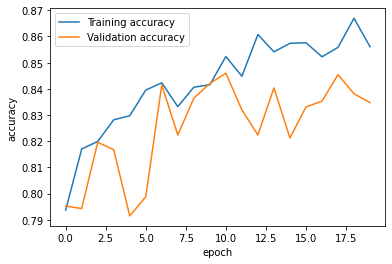

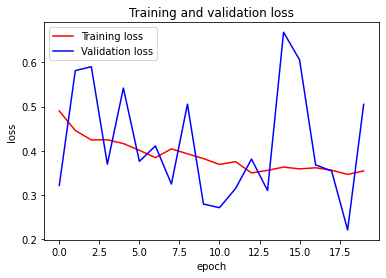

In [ ]:
histFileName = 'historyCNN4-aug.csv'
show_history(history)
finalHistoryFile=find_next_file_history(dirHistFileName,histFileName)
save_history(history.history,finalHistoryFile)

save_elapsedTime(elapsedTime,finalHistoryFile)

In [ ]:
# Final execution with 10 epochs
numEpochs = 10
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
history = cnn4.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=numEpochs,
                    validation_data=val_generator,validation_steps=step_size_val)

cnn4.save('./models/CNN4_celeba_model-10epochs.h5')
end = time.time()
elapsedTime= (end - start)
print("Elapsed Time:")
print("\t\t{:.2f}m".format(elapsedTime/60))

Epoch 1/10
261/261 [==============================] - 129s 496ms/step - loss: 0.3436 - acc: 0.8616 - val_loss: 0.3330 - val_acc: 0.8510
Epoch 2/10
261/261 [==============================] - 131s 502ms/step - loss: 0.3367 - acc: 0.8661 - val_loss: 0.5337 - val_acc: 0.8443
Epoch 3/10
261/261 [==============================] - 131s 503ms/step - loss: 0.3386 - acc: 0.8631 - val_loss: 0.3171 - val_acc: 0.8465
Epoch 4/10
261/261 [==============================] - 131s 502ms/step - loss: 0.3431 - acc: 0.8592 - val_loss: 0.3365 - val_acc: 0.8404
Epoch 5/10
261/261 [==============================] - 131s 500ms/step - loss: 0.3428 - acc: 0.8605 - val_loss: 0.4602 - val_acc: 0.8471
Epoch 6/10
261/261 [==============================] - 130s 499ms/step - loss: 0.3345 - acc: 0.8619 - val_loss: 0.2728 - val_acc: 0.8561
Epoch 7/10
261/261 [==============================] - 131s 502ms/step - loss: 0.3372 - acc: 0.8649 - val_loss: 0.6207 - val_acc: 0.7965
Epoch 8/10
261/261 [============================